## Question

Objective:

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

Data Preprocessing:

1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.

Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

Submission Requirements:

Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.


In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read both train and test files
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

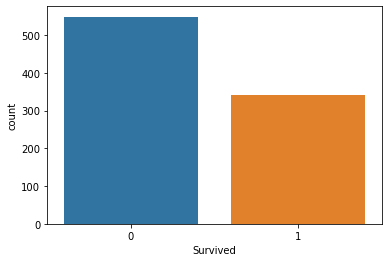

In [9]:
# Analysis using EDA

sns.countplot(x= train['Survived']) #Survival rate

<AxesSubplot:xlabel='Sex', ylabel='count'>

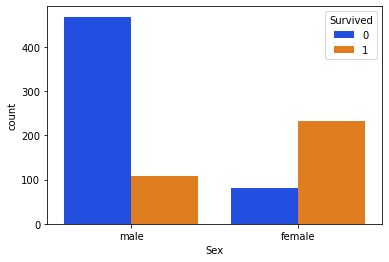

In [10]:
#comparing male to female ratio of those that survived 
sns.countplot(x='Sex', hue= 'Survived', data=train, palette = 'bright') 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

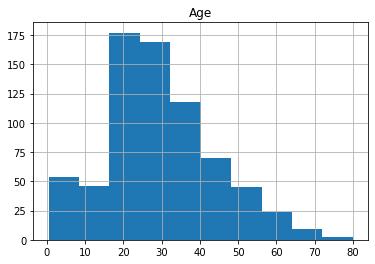

In [11]:
train.hist('Age')

<AxesSubplot:ylabel='Frequency'>

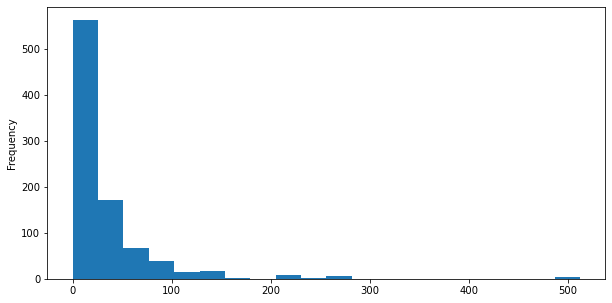

In [12]:
train['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='count', ylabel='SibSp'>

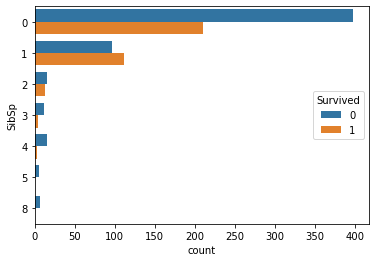

In [13]:
sns.countplot(y='SibSp', hue = "Survived", data=train)

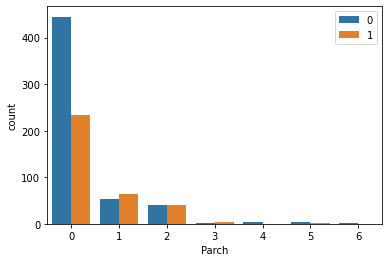

In [14]:
sns.countplot(x='Parch', hue = "Survived", data=train)
plt.legend(loc = 'upper right')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

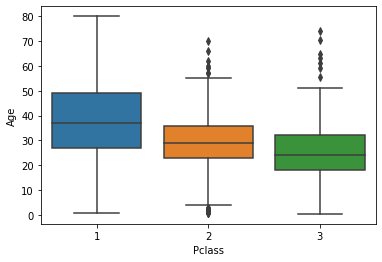

In [15]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
# Performing data wrangling over train and test data

target = train['Survived']

In [17]:
train = train.drop('Survived', axis=1) #dropping survived column 

In [18]:
data = train.append(test) #concatenating both train and test data for pre processing
data.head()

C:\Users\AVI MUDGAL\AppData\Local\Temp\ipykernel_3152\3418952780.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test) #concatenating both train and test data for pre processing


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
target = pd.DataFrame(target)
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [20]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
#dropping columns with high number of missing values
data.drop(['Age', 'Cabin'], axis = 1, inplace = True)

In [22]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [23]:
#filling missing fare value with mean value
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [24]:
#using forward-fill to fill the missing value in the Embarked column
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

In [25]:
data.isnull().sum() #all the missing values have been catered for through data munging

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
#preprocessing and dropping of some columns with low correlation
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True) 

In [27]:
data['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [28]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
#transforming columns with one_hot_encoding
embarked_dummies = pd.get_dummies(data.Embarked)
data = pd.concat([data,embarked_dummies], axis=1)
data = data.drop("Embarked", axis=1)

sex_dummies= pd.get_dummies(data.Sex)
data = pd.concat([data,sex_dummies], axis=1)
data = data.drop("Sex", axis=1)

In [30]:
(data.shape) #train and train data shape

(1309, 9)

In [31]:
new_train_data = data.iloc[:891,]
new_train_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,0,1,0,1
887,1,0,0,30.0000,0,0,1,1,0
888,3,1,2,23.4500,0,0,1,1,0
889,1,0,0,30.0000,1,0,0,0,1


In [32]:
new_test_data = data.iloc[891:,]
new_test_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,0,0,7.8292,0,1,0,0,1
1,3,1,0,7.0000,0,0,1,1,0
2,2,0,0,9.6875,0,1,0,0,1
3,3,0,0,8.6625,0,0,1,0,1
4,3,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,0,1,0,1
414,1,0,0,108.9000,1,0,0,1,0
415,3,0,0,7.2500,0,0,1,0,1
416,3,0,0,8.0500,0,0,1,0,1


In [33]:
# Split into training and testing from new train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_train_data, target, random_state=11,test_size = 0.3)

In [34]:
# Perform xgboost method
import xgboost as xgb

# Setting hyperparameters
dtrain = xgb.DMatrix(x_train, label=y_train)

# Set hyperparameters
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

In [35]:
# Training model with cross validation

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics=['error'],
    early_stopping_rounds=10,
    stratified=True,
    seed=42
)

best_iteration = cv_results['test-error-mean'].idxmin()
best_error = cv_results.loc[best_iteration, 'test-error-mean']

print(f"Best error rate: {best_error:.4f} (iteration: {best_iteration+1})")

Best error rate: 0.1959 (iteration: 44)


In [40]:
# Making predictions on test data and evaluate results
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


dtest = xgb.DMatrix(x_test)

best_model = xgb.train(params, dtrain, num_boost_round=best_iteration+1)

predictions = best_model.predict(dtest)
predictions = [round(value) for value in predictions]

accuracy = accuracy_score(y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.8171641791044776


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Performing lightgb method

import lgboost as lgb

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

In [ ]:
# predict the results
y_pred=clf.predict(x_test)

In [ ]:
# view accuracy

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


XGBoost (Extreme Gradient Boosting) and LightGBM (Light Gradient Boosting Machine) are both popular gradient boosting frameworks known for their efficiency and performance in machine learning tasks, particularly in the realm of structured/tabular data. Here are some key strengths and weaknesses of each:

XGBoost:

Strengths:

Performance: XGBoost is known for its high performance and speed. It implements parallel processing and tree pruning techniques to improve efficiency.
Regularization: It includes regularization techniques like L1 and L2 regularization to prevent overfitting.
Flexibility: It supports various objective functions, including regression, classification, and ranking, making it versatile for different types of problems.
Tree Pruning: XGBoost prunes trees using a depth-first approach, which can lead to better performance and less overfitting.
Handling Missing Values: It has built-in capabilities to handle missing values in the data.

Weaknesses:

Scalability: While XGBoost is generally fast and efficient, it may not scale as well to extremely large datasets as some other methods.
Memory Usage: Due to its design, XGBoost can consume more memory compared to other algorithms, especially when dealing with deep trees.

LightGBM:

Strengths:

Speed: LightGBM is known for its speed and efficiency, especially on large datasets. It uses a histogram-based algorithm for splitting, which reduces computation.
Memory Efficiency: LightGBM uses a leaf-wise growth strategy, which can lead to lower memory usage compared to XGBoost, especially for large datasets.
Scalability: It can handle large datasets efficiently and is designed to scale well with increasing data sizes.
Feature Importance: LightGBM provides built-in feature importance scores, making it easier to interpret the model.

Weaknesses:

Sensitivity to Parameters: LightGBM's performance can be sensitive to its hyperparameters, and tuning them effectively can be challenging.
Less Mature: LightGBM is relatively newer compared to XGBoost and may have fewer resources and community support.